# <center>Расчетная работа по предмету ТВиМС (Часть 1)</center>
При выполнении работы был использован язык программирования Python, а также система Jupyter Notebook.
Подключим нужные для работы библиотеки:
   * [Pandas](https://pandas.pydata.org/) - для работы с данными
   * [matplotlib](https://matplotlib.org/) - для рисования графиков
   * [Seaborn](http://seaborn.pydata.org/) - для визуализации таблиц и визуализации данных
   * math, [NumPy](https://www.numpy.org/), [SciPy](https://www.scipy.org/) - для математических функций 

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np
import math
import scipy
import zipfile
import seaborn as sns
pd.options.display.float_format = '{0:.5f}'.format

Инициализируем random seed:

In [2]:
RANDOM_SEED = 1234

## <center>Дискретные данные</center>

В качестве источника данных использовалась открытая информация о шахматных партиях проводимых на платформе [lichess.org](lichess.org). Данные были взяты на сайте [Kaggle](kaggle.com) по ссылке [Lichess data]().


Импортируем данные:

In [3]:
PATH_TO_CHESS_DATA = './data/games.csv';
chess_dataframe = pd.read_csv(PATH_TO_CHESS_DATA)
chess_dataframe

id  rated     created_at   last_move_at  turns victory_status  \
0      TZJHLljE  False  1504210000000  1504210000000     13      outoftime   
1      l1NXvwaE   True  1504130000000  1504130000000     16         resign   
2      mIICvQHh   True  1504130000000  1504130000000     61           mate   
3      kWKvrqYL   True  1504110000000  1504110000000     61           mate   
4      9tXo1AUZ   True  1504030000000  1504030000000     95           mate   
5      MsoDV9wj  False  1504240000000  1504240000000      5           draw   
6      qwU9rasv   True  1504230000000  1504230000000     33         resign   
7      RVN0N3VK  False  1503680000000  1503680000000      9         resign   
8      dwF3DJHO   True  1503510000000  1503510000000     66         resign   
9      afoMwnLg   True  1503440000000  1503440000000    119           mate   
10     HgKLWPsz  False  1503350000000  1503350000000     39           mate   
11     Vf5fKWzI  False  1503350000000  1503350000000     38         resign   
12     HRti5mKv  False  1503350000000  1503350000000     60         resign   
13     2fEjSei6  False  1503340000000  1503340000000     31         resign   
14     u7i6dOaJ  False  1504090000000  1504100000000     31           mate   
15     guanvMR5  False  1504090000000  1504090000000     43         resign   
16     PmpkWkmm  False  1504090000000  1504090000000     52         resign   
17     EwaK0IsE  False  1504010000000  1504010000000     66           mate   
18     yrSDozT3  False  1504010000000  1504010000000    101         resign   
19     x31mXlvc  False  1503760000000  1503760000000     25         resign   
20     oQklnWWp  False  1502950000000  1502950000000     14         resign   
21     QFCZwY1f  False  1502950000000  1502950000000      3         resign   
22     5cgBygpI  False  1502950000000  1502950000000     17         resign   
23     UhXXBOMY   True  1502950000000  1502950000000     36         resign   
24     mCij4hBq   True  1502860000000  1502860000000     13         resign   
25     ifUMWtVj   True  1502780000000  1502780000000     69           mate   
26     Wf0zuLQQ   True  1502780000000  1502780000000     43         resign   
27     srz9QfSN   True  1502780000000  1502780000000     54           mate   
28     NS6ccssb   True  1502780000000  1502780000000     53         resign   
29     M3vpf2Ki   True  1502780000000  1502780000000     66           mate   
...         ...    ...            ...            ...    ...            ...   
20028  8HGqt5cf   True  1504040986217  1504041720892    115           mate   
20029  2PG68cOv   True  1504012618489  1504012895061     37         resign   
20030  F6akm0V3   True  1504010967826  1504012596273     82         resign   
20031  Pgee4CKk   True  1501997694071  1502002517959     50           mate   
20032  MVxE7oz4  False  1501677181115  1501678131998     53           mate   
20033  Pl7THFmZ  False  1501676616047  1501677156657     36         resign   
20034  P0FNoKsw   True  1501437807675  1501443709475    100           draw   
20035  D6pNwmcM   True  1501013930461  1501014672918     59         resign   
20036  cDSybWIj   True  1501013314563  1501013921140     43           mate   
20037  iG5MuMz0   True  1501012814699  1501013215248     32           mate   
20038  xAQi2hl2   True  1501010609693  1501011691620     36         resign   
20039  NWgLdNx8   True  1500721510409  1500726487679     57         resign   
20040  yM2DgyaO   True  1500296218668  1500297035397     87         resign   
20041  B4IEyQyb   True  1500156933145  1500157507981     58           mate   
20042  5Fx8GBTL   True  1500156024618  1500156777487     53         resign   
20043  Z490CURF   True  1500155828796  1500155994116     11         resign   
20044  PVqRI7Ma   True  1500155188510  1500155823866     37           mate   
20045  e5jFywx3   True  1500026898623  1500030940815     70         resign   
20046  tM5wivnc   True  1499870679207  1499870904528     36           mate   
20047  X0DJ1fJu   True  14998697836

Сделаем выборку нужного количества данных:

In [4]:
CHESS_DATA_SAMPLE_SIZE = chess_dataframe.shape[0]
CHESS_DATA_CRITERIA = 200
chess_sample_dataframe = chess_dataframe \
    .sample(n=CHESS_DATA_SAMPLE_SIZE, random_state=RANDOM_SEED) \
    .reset_index(drop=True)
chess_sample_dataframe = chess_sample_dataframe[chess_sample_dataframe['turns'] <= CHESS_DATA_CRITERIA]
chess_sample_dataframe

id  rated     created_at   last_move_at  turns victory_status  \
0      bRIWbJtD  False  1500920586661  1500920714617      7           draw   
1      WQLn8OYD   True  1482900000000  1482900000000     51           mate   
2      OEM7Uzrh  False  1495922772027  1495923675112     86         resign   
3      Px41L5pw   True  1502000000000  1502000000000    132      outoftime   
4      6yjjzId3   True  1503410000000  1503410000000     68         resign   
5      gq5rkMNe   True  1484200000000  1484200000000     41           mate   
6      XKc01Of0   True  1486440000000  1486450000000     67           mate   
7      w7Jan8kW  False  1503756959255  1503757783228     49         resign   
8      9wVYDTBo   True  1498790000000  1498790000000     69           mate   
9      pGZKY8L9  False  1484280958436  1484281666652     40           mate   
10     OzYw0pn3   True  1498568263237  1498568980804     41      outoftime   
11     i1yPixuq   True  1491280000000  1491280000000     40         resign   
12     JN9jlO0W   True  1472293740648  1472293942963     24         resign   
13     xnrZeC3U  False  1481980000000  1481980000000     30         resign   
14     w5NL4hoN  False  1494550000000  1494550000000     54           mate   
15     VwU8FwEG   True  1504220000000  1504220000000     60           mate   
16     wvyB2GEh   True  1480780000000  1480780000000     14         resign   
17     BY1pyetx   True  1405769757128  1405770392590     47           mate   
18     UaE57nhc  False  1498289726420  1498289906393     19           mate   
19     2akR3Bit   True  1503260000000  1503260000000     49           mate   
20     wjdi5CWe   True  1504381150568  1504383614716     99         resign   
21     v8jHnifC   True  1475930000000  1475930000000    118           mate   
22     WPiUAnsV   True  1453739050583  1453740532082     61      outoftime   
23     y2lwJOkK   True  1496220119875  1496220690688     55         resign   
24     8isnbs4r  False  1497150000000  1497150000000     60           mate   
25     NdQVnh15   True  1473090000000  1473090000000     55           mate   
26     5Z6KGrFi   True  1475406707639  1475415167983    102         resign   
27     sj1tIOnF  False  1503180592181  1503182351433    105         resign   
28     oDKpWvIT   True  1496530000000  1496530000000     59           mate   
29     8zhFddUA   True  1453094028188  1453095040223     61           mate   
...         ...    ...            ...            ...    ...            ...   
20028  2hctEGx7   True  1504473488454  1504473970112     78         resign   
20029  d2fq3MvF  False  1502671774313  1502673910692     93         resign   
20030  FopTwrop   True  1481574486375  1481577299746    101           mate   
20031  xgnbnW0a   True  1398812444197  1398814991248     82      outoftime   
20032  PYE7e3w3   True  1500143720352  1500144643417    122           draw   
20033  618dFq0q   True  1472390000000  1472390000000     40         resign   
20034  mmsuk6m8   True  1390250772415  1390251640268     67           mate   
20035  OHbD1Bj8   True  1504479602510  1504480262539    119           mate   
20036  o3Pxe7sm   True  1503941435908  1503942084334     44         resign   
20037  XoYJeiMM   True  1504286367241  1504286446044     16         resign   
20038  865oiGnl   True  1498861534703  1498862456129    127      outoftime   
20039  a4aKepiK   True  1503860000000  1503860000000     85         resign   
20040  ssAFGqWj   True  1459480000000  1459480000000     91         resign   
20041  uaJh6QVX   True  1485550000000  1485550000000     27           mate   
20042  UVUUmRSQ  False  1488730000000  1488730000000     56           mate   
20043  JyYj994x   True  1485054764987  1485055070588     19         resign   
20044  1SGOVP73   True  1504282356432  1504285048058     89           mate   
20045  ZvZV7mJk   True  1480640000000  1480640000000    115           mate   
20046  rCQJEPJn   True  1447810000000  1447810000000     57           mate   
20047  NmQjNNrg   True  15005610892

Для анализа дискретных данных выберем столбец с количеством ходов в партии шахмат:

In [5]:
turns = chess_sample_dataframe.turns
turns_dataframe = pd.DataFrame(turns)
turns_dataframe.rename(columns={ 'turns': 'Количество ходов в партии' }).T

0      1      2      3      4      5      6      \
Количество ходов в партии      7     51     86    132     68     41     67   

                           7      8      9      ...  20048  20049  20050  \
Количество ходов в партии     49     69     40  ...     90     82     29   

                           20051  20052  20053  20054  20055  20056  20057  
Количество ходов в партии     98      9     91     47     86     50     51  

[1 rows x 20035 columns]

Построим вариационный ряд со значениями частот и частостей:

In [6]:
turns_variational = turns_dataframe['turns'] \
    .sort_values() \
    .reset_index(drop=True) \
    .groupby(turns_dataframe['turns'])
turns_variational_dataframe = pd.DataFrame({
    'count': turns_variational.aggregate(lambda series: series.count()),
    'frequency': turns_variational.aggregate(lambda series: series.count() / turns_dataframe.shape[0]),
})

pd.DataFrame({
    'Значение': turns_variational_dataframe.index,
    'Частота': turns_variational_dataframe['count'],
    'Частость': turns_variational_dataframe['frequency']
}, dtype='object').T \
    .join(pd.DataFrame({ 
        'Сумма': [
            '',
            turns_variational_dataframe['count'].aggregate(np.sum),
            turns_variational_dataframe['frequency'].aggregate(np.sum),
        ],
    }, dtype='object', index=pd.Index(['Значение', 'Частота', 'Частость']))) \
    .reindex(index=pd.Index(['Значение', 'Частота', 'Частость'], name='Количество ходов'))

1.0     2.0     3.0     4.0     5.0     6.0     7.0  \
Количество ходов                                                           
Значение         1.00000 2.00000 3.00000 4.00000 5.00000 6.00000 7.00000   
Частота               18     185      87      52      40      35      70   
Частость         0.00090 0.00923 0.00434 0.00260 0.00200 0.00175 0.00349   

                     8.0     9.0     10.0  ...     187.0     188.0     189.0  \
Количество ходов                           ...                                 
Значение         8.00000 9.00000 10.00000  ... 187.00000 188.00000 189.00000   
Частота               54      75       64  ...         1         2         4   
Частость         0.00270 0.00374  0.00319  ...   0.00005   0.00010   0.00020   

                     190.0     193.0     195.0     196.0     198.0     200.0  \
Количество ходов                                                               
Значение         190.00000 193.00000 195.00000 196.00000 198.00000 200.00000   
Частота                  3         1         1         3         2         2   
Частость           0.00015   0.00005   0.00005   0.00015   0.00010   0.00010   

                   Сумма  
Количество ходов          
Значение                  
Частота            20012  
Частость         0.99885  

[3 rows x 195 columns]

#### <center>1. Интервальный ряд распределения частот и частостей</center>

Вычислим нужные параметры выборки:

In [7]:
turns_min_value = turns_dataframe['turns'].aggregate(np.min)
turns_max_value = turns_dataframe['turns'].aggregate(np.max)
turns_count = turns_dataframe['turns'].shape[0]
pd.DataFrame({
    'Количество данных': turns_count,
    'Количество различных значение': turns_variational_dataframe.shape[0],
    'Минимальное значение': turns_min_value,
    'Максимальное значение': turns_max_value
}, index=['Значение']).astype(dtype='object').T


Значение
Количество данных                20035
Количество различных значение      194
Минимальное значение                 1
Максимальное значение              200

Рассчитаем значения шага и количества интервалов интервального ряда распределения используя формулу Стерджесса:
    
$$
M = 1 + 3.22 * log_{10}(N)
$$

$$
h = \frac{\hat{x}_n - \hat{x}_1}{M} = \frac{\hat{x}_n - \hat{x}_1}{1 + 3.22 * log_{10}(N)}
$$


In [8]:
def calculate_interval_count(n):
    return 3.322 * np.log10(n)
    
interval_count_by_formula = calculate_interval_count(turns_dataframe.shape[0])
interval_value_by_formula = (turns_max_value - turns_min_value) / interval_count_by_formula
interval_count = np.floor(interval_count_by_formula).astype(dtype='int')
interval_value = np.ceil((turns_max_value - turns_min_value) / interval_count).astype(dtype='int')

pd.DataFrame({
    'Число интервалов по формуле': interval_count_by_formula,
    'Шаг по формуле': interval_value_by_formula,
    'Число интервалов (M)': interval_count,
    'Шаг (h)': interval_value
}, index = ['Значение']).astype(dtype='object').T

Значение
Число интервалов по формуле 14.29054
Шаг по формуле              13.92529
Число интервалов (M)              14
Шаг (h)                           15

Построим интервальный ряд распределения:

In [9]:
intervals = [turns_min_value + i * interval_value for i in range(interval_count + 1)]
intervals_indexes = pd.IntervalIndex.from_breaks(intervals, closed='left')
intervals_cut_dataframe = pd.DataFrame({
    'interval': pd.cut(turns_variational_dataframe.index, intervals_indexes)
}, index=turns_variational_dataframe.index)

intervals_dataframe = intervals_cut_dataframe \
    .join(turns_variational_dataframe) \
    .groupby('interval') \
    .aggregate({
        'count': lambda series: series.sum(),
        'frequency': lambda series: series.sum(),
    }).fillna(0) \
    .reset_index()

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$x_i$': intervals_dataframe['interval'].apply(lambda interval: interval.left),
    '$x_{i+1}$': intervals_dataframe['interval'].apply(lambda interval: interval.right),
    '$x_{ср}$': intervals_dataframe['interval'].apply(lambda interval: interval.mid),
    'Частота' : intervals_dataframe['count'].astype(dtype='int'),
    'Частость' : intervals_dataframe['frequency']
}) \
    .reindex(index=intervals_dataframe.index.rename('Индекс интервала'))

Интервал $x_i$ $x_{i+1}$  $x_{ср}$  Частота  Частость
Индекс интервала                                                         
0                    [1, 16)     1        16   8.50000     1160   0.05790
1                   [16, 31)    16        31  23.50000     2401   0.11984
2                   [31, 46)    31        46  38.50000     3744   0.18687
3                   [46, 61)    46        61  53.50000     4089   0.20409
4                   [61, 76)    61        76  68.50000     3131   0.15628
5                   [76, 91)    76        91  83.50000     2023   0.10097
6                  [91, 106)    91       106  98.50000     1362   0.06798
7                 [106, 121)   106       121 113.50000      988   0.04931
8                 [121, 136)   121       136 128.50000      534   0.02665
9                 [136, 151)   136       151 143.50000      314   0.01567
10                [151, 166)   151       166 158.50000      162   0.00809
11                [166, 181)   166       181 173.50000       76   0.00379
12                [181, 196)   181       196 188.50000       21   0.00105
13                [196, 211)   196       211 203.50000        7   0.00035

#### <center>2. Полигон частот</center>

Построим полигон частот:

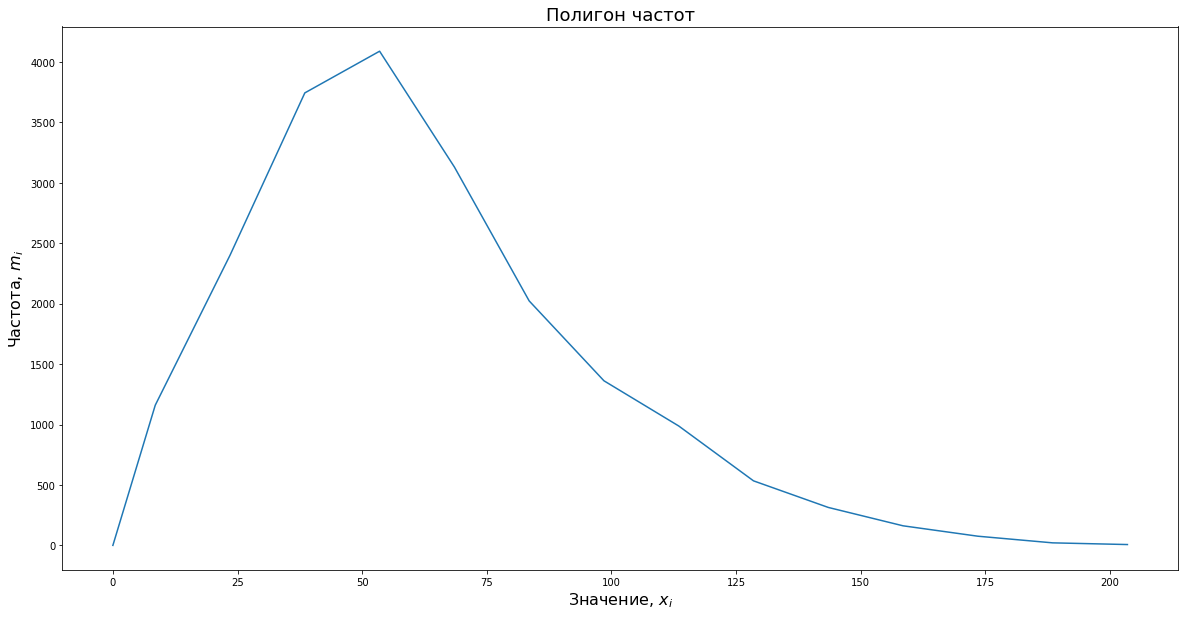

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=[0, *intervals_indexes.mid], y=[0, *intervals_dataframe['count']])
plt.title('Полигон частот', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('Частота, $m_i$', fontsize=16)
plt.show()

Найдем эмпирическую функцию распределения:

In [11]:
empirical_function_intervals_indexes = pd.IntervalIndex.from_breaks([float("-inf"), *intervals, float("+inf")], closed='left')

empirical_function_dataframe = pd.DataFrame({
    'value': [0, 0, *intervals_dataframe['frequency']]
}, index=empirical_function_intervals_indexes.set_closed('right').rename('interval')).cumsum()

empirical_function_dataframe

pd.DataFrame({
    'Значение': empirical_function_dataframe['value']
}, index=empirical_function_dataframe.index.rename('Интервал')).T

Интервал  (-inf, 1.0]  (1.0, 16.0]  (16.0, 31.0]  (31.0, 46.0]  (46.0, 61.0]  \
Значение      0.00000      0.00000       0.05790       0.17774       0.36461   

Интервал  (61.0, 76.0]  (76.0, 91.0]  (91.0, 106.0]  (106.0, 121.0]  \
Значение       0.56870       0.72498        0.82595         0.89394   

Интервал  (121.0, 136.0]  (136.0, 151.0]  (151.0, 166.0]  (166.0, 181.0]  \
Значение         0.94325         0.96990         0.98558         0.99366   

Интервал  (181.0, 196.0]  (196.0, 211.0]  (211.0, inf]  
Значение         0.99745         0.99850       0.99885

 #### <center>3. Эмпирическая функция распределения</center>

Построим эмпирическую функцию распределения:

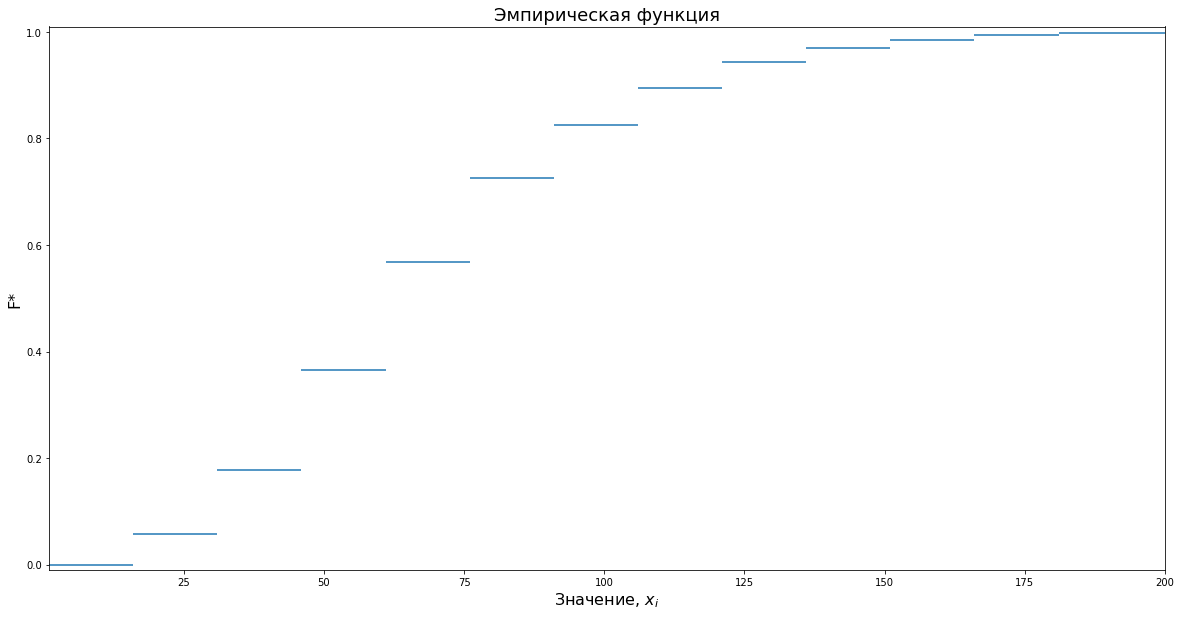

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

xs = zip(empirical_function_dataframe.index.left[:-1], empirical_function_dataframe.index.left[1:])
ys = zip([*empirical_function_dataframe['value']][:-1], [*empirical_function_dataframe['value']][:-1])
lines = matplotlib.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)])

ax.add_collection(lines)
ax.set_xlim([turns_min_value, turns_max_value])
ax.set_ylim([-0.01, 1.01])
plt.title('Эмпирическая функция', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('F*', fontsize=16)
plt.show()

 #### <center>4. Характеристики распределения</center>

Вычислим характеристики распределения:

In [13]:
intervals_count = intervals_dataframe['count']
t_count_max_idx = intervals_count.idxmax()
t_max = intervals_count.get(t_count_max_idx, 0)
t_max_left = intervals_dataframe['interval'][t_count_max_idx].left
t_max_minus_1 = intervals_count.get(t_count_max_idx - 1, 0)
t_max_plus_1 = intervals_count.get(t_count_max_idx + 1, 0)

characteristics_dataframe = pd.DataFrame({
}, index=['value'], dtype='object')

characteristics_dataframe['min'] = \
    [turns_min_value]
characteristics_dataframe['max'] = \
    [turns_max_value]
characteristics_dataframe['mode'] = \
    [turns_variational_dataframe[turns_variational_dataframe['count'] == turns_variational_dataframe['count'].max()].reset_index()['turns'][0]]
characteristics_dataframe['median'] = \
    [turns_variational_dataframe[turns_variational_dataframe['count'].cumsum() >= turns_count / 2].iloc[0].name]
characteristics_dataframe['expectation'] = \
    [turns_variational_dataframe.reset_index()['turns'].mul(turns_variational_dataframe.reset_index()['count']).sum() / turns_variational_dataframe.reset_index()['count'].sum()]

linear_differential = \
    turns_variational_dataframe.reset_index()['turns'] \
        .apply(lambda entry: entry - characteristics_dataframe['expectation'][0]) \
        .astype(dtype='float') \
        .abs() \
        .mul(turns_variational_dataframe.reset_index()['frequency'])

characteristics_dataframe['second_moment'] = \
    [turns_variational_dataframe.reset_index()['turns'].pow(2).mul(turns_variational_dataframe.reset_index()['count']).sum() / turns_variational_dataframe.reset_index()['count'].sum()]
characteristics_dataframe['dispersion'] = \
    characteristics_dataframe['second_moment'] - characteristics_dataframe['expectation'] ** 2
characteristics_dataframe['sigma'] = \
    np.sqrt(characteristics_dataframe['dispersion'])
characteristics_dataframe['variational_coeff'] = \
    characteristics_dataframe['sigma'].div(characteristics_dataframe['expectation'])
characteristics_dataframe['variation_range'] = \
    characteristics_dataframe['max'] - characteristics_dataframe['min']

central_moment_3 = \
    turns_variational_dataframe.reset_index()['turns'] \
        .apply(lambda entry: entry - characteristics_dataframe['expectation'][0]) \
        .astype(dtype='float') \
        .pow(3) \
        .mul(turns_variational_dataframe.reset_index()['frequency'])

central_moment_4 = \
    turns_variational_dataframe.reset_index()['turns'] \
        .apply(lambda entry: entry - characteristics_dataframe['expectation'][0]) \
        .astype(dtype='float') \
        .pow(4) \
        .mul(turns_variational_dataframe.reset_index()['frequency'])

characteristics_dataframe['assymetry'] = \
    central_moment_3.aggregate(np.sum) / \
        (characteristics_dataframe['sigma'] ** 3)

characteristics_dataframe['excess'] = \
    central_moment_4.aggregate(np.sum) / \
        (characteristics_dataframe['sigma'] ** 4) - 3

In [14]:
pd.DataFrame({
    'Среднее линейное отконение': linear_differential,
    'Центральные моменты 3-го порядка': central_moment_3,
    'Центральные моменты 4-го порядка': central_moment_4,
})

Среднее линейное отконение  Центральные моменты 3-го порядка  \
0                       0.05325                        -187.02884   
1                       0.53802                       -1826.57168   
2                       0.24867                        -815.51007   
3                       0.14604                        -462.33967   
4                       0.11034                        -337.01865   
5                       0.09480                        -279.17177   
6                       0.18611                        -528.04203   
7                       0.14087                        -384.83267   
8                       0.19191                        -504.39426   
9                       0.16057                        -405.71748   
10                      0.23607                        -572.97294   
11                      0.18550                        -432.15131   
12                      0.20053                        -448.00915   
13                      0.22631                        -484.43284   
14                      0.28016                        -574.06349   
15                      0.24083                        -471.91032   
16                      0.28722                        -537.66811   
17                      0.22573                        -403.25513   
18                      0.30690                        -522.62040   
19                      0.26931                        -436.66013   
20                      0.29202                        -450.25636   
21                      0.24639                        -360.78864   
22                      0.36271                        -503.72934   
23                      0.27514                        -361.88221   
24                      0.28340                        -352.46789   
25                      0.28905                        -339.39264   
26                      0.33042                        -365.66278   
27                      0.27379                        -285.04322   
28                      0.34645                        -338.68570   
29                      0.33688                        -308.60105   
..                          ...                               ...   
164                     0.03137                         344.04886   
165                     0.02639                         294.99852   
166                     0.02131                         242.75838   
167                     0.05377                         624.11452   
168                     0.03256                         384.99343   
169                     0.06025                         725.47481   
170                     0.04974                         609.94621   
171                     0.02231                         278.49803   
172                     0.03376                         429.06407   
173                     0.02271                         293.72243   
174                     0.01718                         226.15380   
175                     0.00578                          77.37295   
176                     0.01165                         158.79192   
177                     0.02938                         407.26964   
178                     0.01778                         250.64147   
179                     0.01793                         257.02782   
180                     0.00603                          87.84058   
181                     0.01823                         270.12415   
182                     0.01225                         184.55728   
183                     0.00618                          94.55265   
184                     0.01245                         193.72743   
185                     0.00633                         101.59821   
186                     0.01275                         208.04448   
187                     0.02570                         425.93810   
188                     0.01943                         326.95608   
189                     0.00663                         116.72217   
190

In [15]:
pd.DataFrame({
    'Минимальное значение': characteristics_dataframe['min'][0],
    'Максимальное значение': characteristics_dataframe['max'][0],
    'Мода': characteristics_dataframe['mode'][0],
    'Медиана': characteristics_dataframe['median'][0],
    'Математическое ожидание': characteristics_dataframe['expectation'][0],
    'Второй момент': characteristics_dataframe['second_moment'][0],
    'Дисперсия': characteristics_dataframe['dispersion'][0],
    'σ': characteristics_dataframe['sigma'][0],
    'Коэффицент вариации': characteristics_dataframe['variational_coeff'][0],
    'Размах вариации': characteristics_dataframe['variation_range'][0],
    'Ассиметрия': characteristics_dataframe['assymetry'][0],
    'Эксцесс': characteristics_dataframe['excess'][0]
}, index=['Значение']).T

Значение
Минимальное значение       1.00000
Максимальное значение    200.00000
Мода                      53.00000
Медиана                   55.00000
Математическое ожидание   60.26639
Второй момент           4726.30437
Дисперсия               1094.26658
σ                         33.07970
Коэффицент вариации        0.54889
Размах вариации          199.00000
Ассиметрия                 0.77819
Эксцесс                    0.55193

 #### <center>5. Проверка качества группировки</center>

Рассмотрим характеристики каждого интервала:

In [16]:
interval_indexer = intervals_dataframe[['interval']].set_index('interval').index.get_indexer

x_interval_mid = intervals_dataframe['interval'].apply(lambda interval: interval.mid).astype('float')
x_interval_count = intervals_dataframe.groupby('interval').aggregate({
    'count': lambda series: series.sum()
}).reset_index(drop=True)['count']
x_interval_frequency = intervals_dataframe.groupby('interval').aggregate({
    'frequency': lambda series: series.sum()
}).reset_index(drop=True)['frequency']

x_interval_weighted_value = intervals_cut_dataframe \
    .join(turns_variational_dataframe) \
    .join(turns_variational_dataframe['count'].mul( \
        turns_variational_dataframe.reset_index().set_index('turns', drop=False)['turns'] \
                                                  ).rename('weighted_value')) \
    .groupby('interval') \
    .aggregate({ 'weighted_value': np.sum}) \
    .reset_index(drop=True)['weighted_value']

x_interval_group_mean = x_interval_weighted_value.div(x_interval_count).fillna(0)
x_joint_interval_mean = characteristics_dataframe['expectation'][0]

x_crossgroup_dispersion = \
    (x_interval_group_mean - x_joint_interval_mean).pow(2).mul(x_interval_count).sum() / x_interval_count.sum()

turns_variational_dataframe_with_group_mean = intervals_cut_dataframe \
    .join(turns_variational_dataframe) \
    .join(pd.DataFrame({
        'group_mean': [*x_interval_group_mean.iloc[interval_indexer(turns_variational_dataframe.reset_index()['turns'])].reindex()]
    }, index=turns_variational_dataframe.index)).reset_index()

x_interval_group_dispersion = turns_variational_dataframe_with_group_mean \
    .join(pd.DataFrame({
        'squared_diff': (turns_variational_dataframe_with_group_mean['turns'] - turns_variational_dataframe_with_group_mean['group_mean']).pow(2).mul(turns_variational_dataframe_with_group_mean['count'])
    })) \
    .groupby('interval') \
    .aggregate({ 'squared_diff': np.sum }) \
    .reset_index()['squared_diff'].div(x_interval_count) \
    .fillna(0)

x_interval_h = intervals_dataframe['interval'].apply(lambda x: x.right - x.left)

x_interval_frequency = \
    x_interval_count / turns_dataframe.shape[0]
x_interval_statistical_pmf = \
    x_interval_frequency / x_interval_h
x_interval_statistical_cdf = \
    x_interval_frequency.cumsum();

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$x_{i ср}$': x_interval_mid,
    '$v_{i}$': x_interval_count,
    '$p_{i}^{*}$': x_interval_count / turns_dataframe.shape[0],
    '$f_{i}^{*}$': x_interval_statistical_pmf,
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '$\overline{x}_{i}$': x_interval_group_mean,
    '$\sigma^{2}_j$': x_interval_group_dispersion,
})

Интервал  $x_{i ср}$  $v_{i}$  $p_{i}^{*}$  $f_{i}^{*}$  $F_{i}^{*}$  \
0      [1, 16)     8.50000     1160      0.05790      0.00386      0.05790   
1     [16, 31)    23.50000     2401      0.11984      0.00799      0.17774   
2     [31, 46)    38.50000     3744      0.18687      0.01246      0.36461   
3     [46, 61)    53.50000     4089      0.20409      0.01361      0.56870   
4     [61, 76)    68.50000     3131      0.15628      0.01042      0.72498   
5     [76, 91)    83.50000     2023      0.10097      0.00673      0.82595   
6    [91, 106)    98.50000     1362      0.06798      0.00453      0.89394   
7   [106, 121)   113.50000      988      0.04931      0.00329      0.94325   
8   [121, 136)   128.50000      534      0.02665      0.00178      0.96990   
9   [136, 151)   143.50000      314      0.01567      0.00104      0.98558   
10  [151, 166)   158.50000      162      0.00809      0.00054      0.99366   
11  [166, 181)   173.50000       76      0.00379      0.00025      0.99745   
12  [181, 196)   188.50000       21      0.00105      0.00007      0.99850   
13  [196, 211)   203.50000        7      0.00035      0.00002      0.99885   

    $\overline{x}_{i}$  $\sigma^{2}_j$  
0              8.46638        21.57128  
1             23.83257        18.37763  
2             38.39744        18.41095  
3             52.93495        17.92485  
4             67.43660        18.64841  
5             82.49086        18.79564  
6             97.60279        18.30405  
7            112.74190        18.32306  
8            127.39513        18.09668  
9            142.23248        19.17844  
10           156.83333        17.08951  
11           171.64474        15.41326  
12           186.85714        14.50340  
13           197.71429         2.77551

Найдем значения общей дисперсии через сумму средней внутригрупповой дисперсии и межгрупповой дисперсии используя формулу:

$$ \sigma^2_{общ} = \overline{\sigma^{2}_{i}} + \sigma^{2}_{мг} $$

In [17]:
x_group_dispersion_mean = x_interval_group_dispersion.mul(x_interval_count).sum() / x_interval_count.sum()
x_dispersion_joint = x_group_dispersion_mean + x_crossgroup_dispersion

pd.DataFrame({
    '$\overline{\sigma^{2}_{i}}$': x_group_dispersion_mean,
    '$\sigma^{2}_{мг}$': x_crossgroup_dispersion,
    '$\sigma^2_{общ}$': x_dispersion_joint,
    '$\sigma^2$': characteristics_dataframe['dispersion'][0],
    '$|\sigma^2 - \sigma^{2}_{общ}|$': abs(characteristics_dataframe['dispersion'][0] - x_dispersion_joint),
    '$\tfrac{\overline{\sigma^{2}_{i}}}{\sigma^{2}_{общ}}$': x_group_dispersion_mean / x_dispersion_joint
}, index=['Значение']).T

Значение
$\overline{\sigma^{2}_{i}}$                          18.52725
$\sigma^{2}_{мг}$                                  1075.73934
$\sigma^2_{общ}$                                   1094.26658
$\sigma^2$                                         1094.26658
$|\sigma^2 - \sigma^{2}_{общ}|$                       0.00000
$\tfrac{\overline{\sigma^{2}_{i}}}{\sigma^{2}_{...    0.01693

Вычислив отклонение $\sigma^2_{общ}$ от $\sigma^2$ можно заключить, что правило сложения правило сложения дисперсий выполняется.

 #### <center>6. Гипотеза о виде распределения</center>

Проанализировав полигон частот и эмпирический график функции распределения выдвинем гипотезу о том, что распределение является бета-биномиальным:

$$
f(k | a, b, n) = \binom{n}{k}\frac{B(k, \alpha, n - k - \alpha)}{B(\alpha, \beta))}
$$
Где $B(x, y) = \int_{0}^{1}{t^{x - 1}(1-t)^{y}dt}$

In [18]:
class beta_binomial_gen(scipy.stats.rv_discrete):
        def _pmf(self, k, a, b, n):
            return scipy.special.binom(n, k) * scipy.special.beta(k + a, n - k + b) / scipy.special.beta(a, b)
        
        def _argcheck(self, a, b, n):
            return a > 0 and b > 0 and n > 0

beta_binomial = beta_binomial_gen(name="beta binomial")

Найдем параметры распределения:
$$
\hat{\mu}_1 = \frac{1}{N} \sum_{i=1}^{N}{x_i}
$$
$$
\hat{\mu}_2 = \frac{1}{N} \sum_{i=1}^{N}{x^2_i}
$$

$$
\hat{\alpha} = \frac{n * \hat{\mu}_1 - \hat{\mu}_2}{n * (\frac{\hat{\mu}_2}{\hat{\mu}_1} - \hat{\mu}_1 - 1) + \hat{\mu}_1}
$$

$$
\hat{\beta} = \frac{(n - \hat{\mu}_1) * (n - \frac{\hat{\mu}_2} {\hat{\mu}_1})}{n * (\frac{\hat{\mu}_2}{\hat{\mu}_1} - \hat{\mu}_1 - 1) + \hat{\mu}_1}
$$

In [19]:
x_n = 1000
x_mu_1 = characteristics_dataframe['expectation'][0]
x_mu_2 = characteristics_dataframe['second_moment'][0]
x_alpha = (x_n * x_mu_1 - x_mu_2) / (x_n * (x_mu_2 / x_mu_1 - x_mu_1 - 1) + x_mu_1)
x_beta = ((x_n - x_mu_1) * (x_n - x_mu_2 / x_mu_1)) / (x_n * (x_mu_2 / x_mu_1 - x_mu_1 - 1) + x_mu_1)

pd.DataFrame({
    '$n$': x_n,
    '$\hat{\mu}_1$': x_mu_1,
    '$\hat{\mu}_2$': x_mu_2,
    '$\hat{α}$': x_alpha,
    '$\hat{β}$': x_beta
}, index=['Значение']).T

Значение
$n$           1000.00000
$\hat{\mu}_1$   60.26639
$\hat{\mu}_2$ 4726.30437
$\hat{α}$        3.22581
$\hat{β}$       50.29998

 #### <center>6. Сравнение с теоретическим распределением</center>

Сравним теоретические и эмпирические характеристики:

In [20]:
x_theoretical_expectation = x_n * x_alpha / (x_alpha + x_beta)
x_theoretical_dispersion = \
    x_n * x_alpha * x_beta  * (x_n + x_alpha + x_beta) / ((x_alpha + x_beta) ** 2 * (x_alpha + x_beta + 1))
x_theoretical_assymetry = \
    (x_alpha + x_beta + 2 * x_n) * (x_beta - x_alpha) / (x_beta + x_alpha + 2) * \
    math.sqrt((1 + x_alpha + x_beta) / (x_n * x_alpha * x_beta * (x_n + x_alpha + x_beta)))
x_theoretical_second_moment = x_theoretical_dispersion + x_theoretical_expectation ** 2
x_theoretical_sigma = math.sqrt(x_theoretical_dispersion)
x_theoretical_variational_coeff = x_theoretical_sigma / x_theoretical_expectation
x_theoretical_variational_excess = \
    (x_alpha + x_beta) ** 2 * (1 + x_alpha + x_beta) / (x_n * x_alpha * x_beta * \
                                                        (x_alpha + x_beta + 2) * \
                                                        (x_alpha + x_beta + 3) * \
                                                        (x_alpha + x_beta + x_n) \
                                                       ) * \
    ((x_alpha + x_beta) * (x_alpha + x_beta - 1 + 6 * x_n) + 3 * x_alpha * x_beta * (x_n - 2) + 6 * x_n ** 2 - \
     3 * x_alpha * x_beta * x_n * (6 - x_n) / (x_alpha + x_beta) - 18 * x_alpha * x_beta * x_n ** 2 / (x_alpha + x_beta) ** 2
    ) - 3

rv = beta_binomial(x_alpha, x_beta, x_n)
x = range(0, x_n + 1)
x_theoretical_mode = x[rv.pmf(x).argmax()]
x_theoretical_median = rv.median()


pd.DataFrame({
    'Мода': [characteristics_dataframe['mode'][0], x_theoretical_mode],
    'Медиана': [characteristics_dataframe['median'][0], x_theoretical_median],
    'Математическое ожидание': [characteristics_dataframe['expectation'][0], x_theoretical_expectation],
    'Второй момент': [characteristics_dataframe['second_moment'][0], x_theoretical_second_moment],
    'Дисперсия': [characteristics_dataframe['dispersion'][0], x_theoretical_dispersion],
    'σ': [characteristics_dataframe['sigma'][0], x_theoretical_sigma],
    'Коэффицент вариации': [characteristics_dataframe['variational_coeff'][0], x_theoretical_variational_coeff],
    'Ассиметрия': [characteristics_dataframe['assymetry'][0], x_theoretical_assymetry],
    'Эксцесс': [characteristics_dataframe['excess'][0], x_theoretical_variational_excess]
}, index=['Эмпирическое', 'Теоретическое']).T

Эмпирическое  Теоретическое
Мода                         53.00000       43.00000
Медиана                      55.00000       55.00000
Математическое ожидание      60.26639       60.26639
Второй момент              4726.30437     4726.30437
Дисперсия                  1094.26658     1094.26658
σ                            33.07970       33.07970
Коэффицент вариации           0.54889        0.54889
Ассиметрия                    0.77819        0.98325
Эксцесс                       0.55193        1.31793

Найдем теоретические значения частот и частостей в интервалах и сравним с эмпирическими:

In [21]:
x_theoretical_interval_frequency = intervals_dataframe['interval'] \
    .apply(lambda interval: rv.cdf(interval.right) - rv.cdf(interval.left)) \
    .astype('float')
x_theoretical_interval_count = x_theoretical_interval_frequency.mul(turns_dataframe.shape[0])
x_theoretical_cdf = x_theoretical_interval_frequency.rename('$F_0$').cumsum()

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$v_{i}$': x_interval_count,
    '$p_{i}^{*}$':  x_interval_frequency,
    '$f_{i}^{*}$':  x_interval_statistical_pmf,
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '${v_{i}}\'$': x_theoretical_interval_count,
    '${p_{i}}\'$': x_theoretical_interval_frequency,
    '${F_{0,i}}$': x_theoretical_cdf,
})

Интервал  $v_{i}$  $p_{i}^{*}$  $f_{i}^{*}$  $F_{i}^{*}$  ${v_{i}}'$  \
0      [1, 16)     1160      0.05790      0.00386      0.05790   938.55412   
1     [16, 31)     2401      0.11984      0.00799      0.17774  2972.61271   
2     [31, 46)     3744      0.18687      0.01246      0.36461  3963.83024   
3     [46, 61)     4089      0.20409      0.01361      0.56870  3772.92933   
4     [61, 76)     3131      0.15628      0.01042      0.72498  2995.31461   
5     [76, 91)     2023      0.10097      0.00673      0.82595  2117.34441   
6    [91, 106)     1362      0.06798      0.00453      0.89394  1377.90828   
7   [106, 121)      988      0.04931      0.00329      0.94325   841.53762   
8   [121, 136)      534      0.02665      0.00178      0.96990   488.15069   
9   [136, 151)      314      0.01567      0.00104      0.98558   271.07504   
10  [151, 166)      162      0.00809      0.00054      0.99366   144.88662   
11  [166, 181)       76      0.00379      0.00025      0.99745    74.82052   
12  [181, 196)       21      0.00105      0.00007      0.99850    37.43220   
13  [196, 211)        7      0.00035      0.00002      0.99885    18.17807   

    ${p_{i}}'$  ${F_{0,i}}$  
0      0.04685      0.04685  
1      0.14837      0.19522  
2      0.19785      0.39306  
3      0.18832      0.58138  
4      0.14950      0.73088  
5      0.10568      0.83657  
6      0.06878      0.90534  
7      0.04200      0.94734  
8      0.02436      0.97171  
9      0.01353      0.98524  
10     0.00723      0.99247  
11     0.00373      0.99620  
12     0.00187      0.99807  
13     0.00091      0.99898

Сравним графики:

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
frequency_plot_indexes = [0, *intervals_indexes.mid]
sns.lineplot(x=frequency_plot_indexes, y=[0, *intervals_dataframe['count']], label='Эмпирическая частота')

rv = beta_binomial(x_alpha, x_beta, x_n)
y = [0, *map(lambda x: (rv.cdf(x.right) - rv.cdf(x.left)) * turns_dataframe.shape[0], intervals_indexes)]
sns.lineplot(x=frequency_plot_indexes, y=y, label='Теоретическая частота')
plt.title('График частоты', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('Частота', fontsize=16)
plt.show()

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
frequency_plot_indexes = [0, *intervals_indexes.mid]
sns.lineplot(x=frequency_plot_indexes, y=[0, *x_interval_statistical_cdf], label='Эмпирическая функция распределения')
sns.lineplot(x=frequency_plot_indexes, y=[0, *x_theoretical_cdf], label='Теоретическая функция распределения')
plt.title('Функции распределения', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('F', fontsize=16)
plt.show()

 #### <center>7. Проверка критериев</center>

Принем уровень значимости:
$$
\alpha = 0.05
$$

In [24]:
level_significance = 0.05

 ##### 7.1 Проверка критерия согласия Пирсона

Посчитаем данные для критерия:

In [25]:
x_criteria_value = x_interval_count.sub(x_theoretical_interval_count).pow(2) \
    .div(x_theoretical_interval_count)
pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    'Критерий': x_criteria_value
})

Интервал  Критерий
0      [1, 16)  52.24875
1     [16, 31) 109.91714
2     [31, 46)  12.19158
3     [46, 61)  26.47828
4     [61, 76)   6.14644
5     [76, 91)   4.20379
6    [91, 106)   0.18366
7   [106, 121)  25.49052
8   [121, 136)   4.30637
9   [136, 151)   6.79720
10  [151, 166)   2.02136
11  [166, 181)   0.01859
12  [181, 196)   7.21350
13  [196, 211)   6.87362

Посчитаем значение параметра количество степеней свободы:
$$
df = k - p - 1
$$
Где p = 3, для трех параметров

In [26]:
degrees_freedom = intervals_dataframe.shape[0] - 3 - 1
print(degrees_freedom)

10


Посчитаем значение критерия $\chi^2$ и сравним с табличным:
$$
\chi^2 = \sum^{M}_{i=1}\frac{(v_i - n p_i)^2}{np_i}
$$

In [27]:
chi = x_criteria_value.sum()
chi_table = scipy.stats.chi2(degrees_freedom).ppf(1 - level_significance)

pd.DataFrame({
    '$\chi^2$': chi,
    '$\chi^2_{табл}$': chi_table 
}, index=['Значение']).T

Значение
$\chi^2$        264.09081
$\chi^2_{табл}$  18.30704

Исходя из того, что $\chi^2 > \chi^2_{табл}$, утверждаем что, гипотеза опровергается.

##### 7.2 Проверка критерия согласия Романовского

Вычислим значение критерия согласия Романовского:
$$
R = \frac{|\chi^2 - df|}{\sqrt{2df}}
$$
Где $df$ - число степеней свободы

In [28]:
x_r = abs(chi - degrees_freedom) / math.sqrt(2 * degrees_freedom)
pd.DataFrame({
    '$R$': x_r
}, index=['Значение']).T

Значение
$R$  56.81643

Так как $R > 3$, то гипотеза опровергается.

##### 7.3 Проверка критерия согласия Колмогорова

Вычислим значение критерия согласия Колмогорова:
$$
\lambda = \sqrt{n} * Z
$$
Где $Z = \max\limits_{1 \le i \le n}{|F^{*}(x+i) - F_{0}(x_i)|}$

In [29]:
empirical_function_dataframe[1:-1].reset_index() \
    .join(x_interval_statistical_cdf.rename('$F_0$')) \
    .join
pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '${F_{0,i}}$': x_theoretical_cdf,
})

Интервал  $F_{i}^{*}$  ${F_{0,i}}$
0      [1, 16)      0.05790      0.04685
1     [16, 31)      0.17774      0.19522
2     [31, 46)      0.36461      0.39306
3     [46, 61)      0.56870      0.58138
4     [61, 76)      0.72498      0.73088
5     [76, 91)      0.82595      0.83657
6    [91, 106)      0.89394      0.90534
7   [106, 121)      0.94325      0.94734
8   [121, 136)      0.96990      0.97171
9   [136, 151)      0.98558      0.98524
10  [151, 166)      0.99366      0.99247
11  [166, 181)      0.99745      0.99620
12  [181, 196)      0.99850      0.99807
13  [196, 211)      0.99885      0.99898

In [30]:
Z = x_theoretical_cdf.sub(x_interval_statistical_cdf).abs().max()
lambd = math.sqrt(interval_count) * Z
lambd_table = scipy.stats.ksone(degrees_freedom).ppf(1 - level_significance)
pd.DataFrame({
    '$Z$': Z,
    '$\lambda$': lambd,
    '$\lambda_{табл}$': lambd_table,
}, index=['Значение']).T

Значение
$Z$                0.02845
$\lambda$          0.10645
$\lambda_{табл}$   0.36866

Так как $\lambda < \lambda_{табл}$, то гипотеза принимается.

##### 7.4 Проверка критерия согласия Ястремского

Вычислим значение критерия согласия Ястремского:
$$
J = \frac{\chi^2 - df}{\sqrt{2n + 2.4}}
$$
Где $n$ - количество групп в вариационном ряду

In [31]:
J = abs(chi - degrees_freedom) / math.sqrt(2 * interval_count + 2.4)
pd.DataFrame({
    '$J$': J
}, index=['Значение']).T

Значение
$J$  46.08421

Так как $J > 3$, то гипотеза опровергается.